2. Henry coeff for CO2, N2
3. Pure isotherms for CO2, N2

problems with ZIF-90 N2 isotherms (both Henry and pure)

### Question 1 - Properties of materials

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyiast as pyiast
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
#Pore analysis for Mg-MOF-74
material_data = pd.read_csv("Mg-MOF-74.csv")
print("Properties of Mg-MOF-74:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of Mg-MOF-74:
Accessible surface area: 222.828 A^2
Density: 0.886275 g/cm^3
Probe-occupiable accessible volume: 837.198 A^3
Material porosity: 0.61368


In [3]:
#pore analysis is NOTT-300
material_data = pd.read_csv("NOTT-300.csv")
print("Properties of NOTT-300:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of NOTT-300:
Accessible surface area: 453.452 A^2
Density: 1.03926 g/cm^3
Probe-occupiable accessible volume: 1297.11 A^3
Material porosity: 0.48999


In [4]:
#pore analysis of UTSA-20
material_data = pd.read_csv("UTSA-20.csv")
print("Properties of UTSA-20:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of UTSA-20:
Accessible surface area: 1307.51 A^2
Density: 0.882399 g/cm^3
Probe-occupiable accessible volume: 3575.36 A^3
Material porosity: 0.62907


In [5]:
#pore analysis of UTSA-80
material_data = pd.read_csv("UTSA-80.csv")
print("Properties of UTSA-80:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of UTSA-80:
Accessible surface area: 3114.62 A^2
Density: 0.678215 g/cm^3
Probe-occupiable accessible volume: 9619.78 A^3
Material porosity: 0.66798


In [6]:
#pore analysis of ZIF-8
material_data = pd.read_csv("ZIF-8.csv")
print("Properties of ZIF-8:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of ZIF-8:
Accessible surface area: 787.421 A^2
Density: 0.909567 g/cm^3
Probe-occupiable accessible volume: 2488.25 A^3
Material porosity: 0.49906


## Question 2 — Henry’s Coefficients

We load the Henry’s constants $K_H$ for CO₂ and N₂ at 25 °C from the CSV files to compare their gas affinities.
A higher $K_H$ indicates stronger CO₂ adsorption; we then rank the materials by decreasing $K_H(\mathrm{CO₂})$.

🔎 CO₂ Henry files: 5 | N₂ Henry files: 5


,MOF,KH_CO2 (mmol·g⁻¹·bar⁻¹),KH_N2 (mmol·g⁻¹·bar⁻¹),KH_ratio CO2/N2
0,NOTT,18.5,1.05,17.53
1,Mg,8.66,0.334,25.96
2,UTSA-20,4.1,0.438,9.37
3,UTSA-80,1.7,0.333,5.11
4,ZIF-8,0.883,nan,nan



Used:
 - Mg — CO2:Mg-H-CO2.csv | N2:Mg-H-N2.csv
 - NOTT — CO2:NOTT-H-CO2.csv | N2:NOTT-H-N2.csv
 - UTSA-20 — CO2:UTSA-20-H-CO2.csv | N2:UTSA-20-H-N2.csv
 - UTSA-80 — CO2:UTSA-80-H-CO2.csv | N2:UTSA-80-H-N2.csv
 - ZIF-8 — CO2:ZIF-8-H-CO2.csv | N2:ZIF-8-H-N2.csv


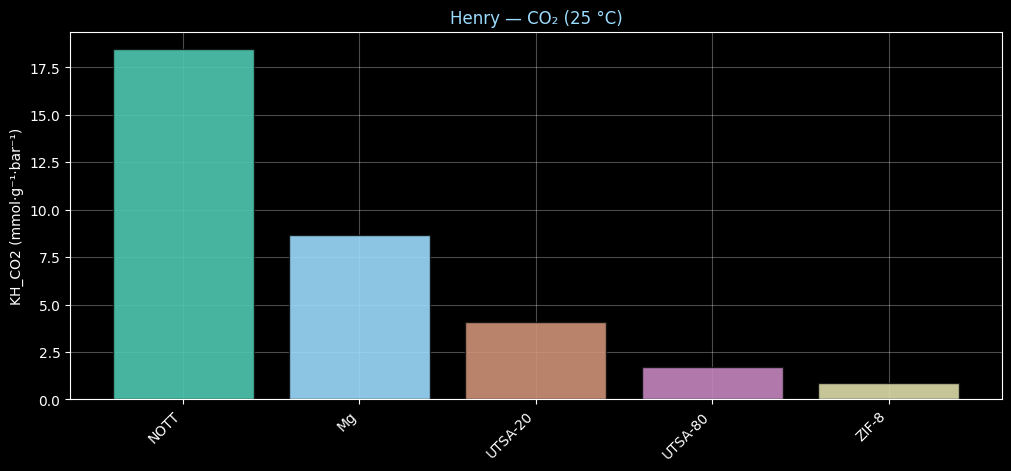

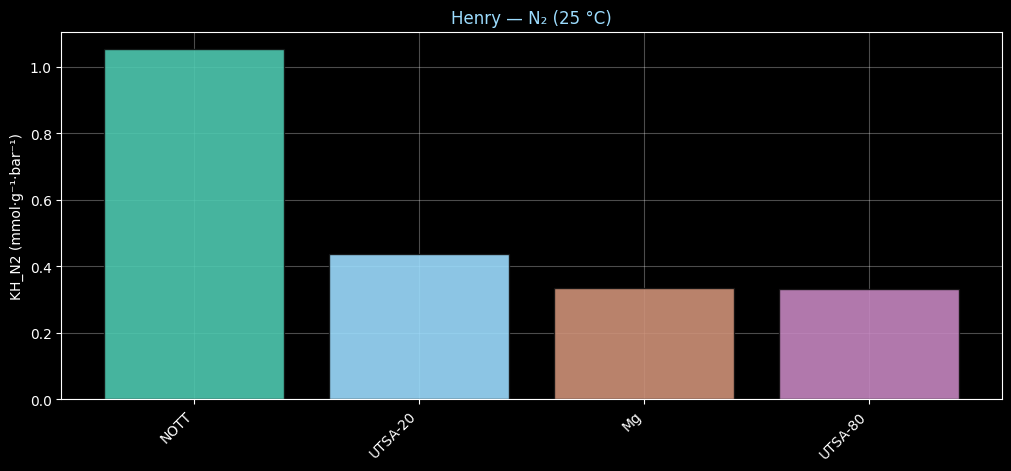

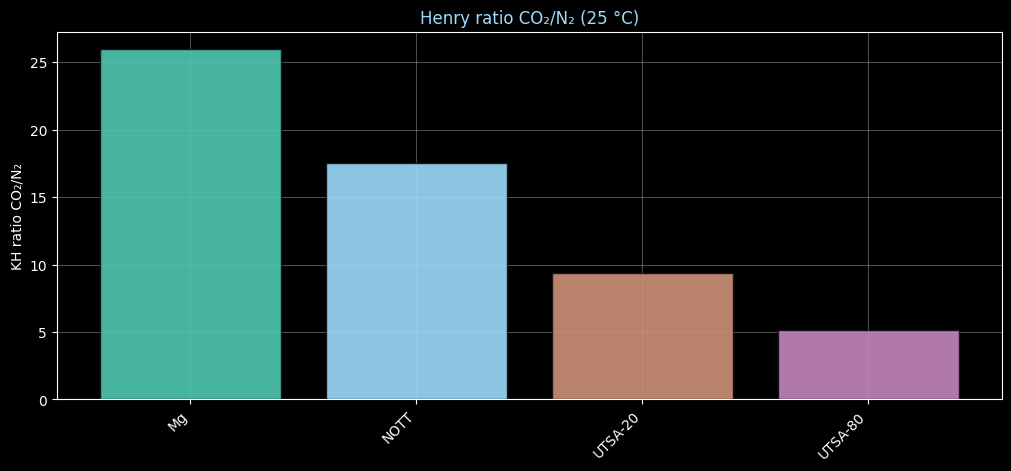

In [7]:
# ================================================
# Q2 — Henry coefficients (CO₂ & N₂): extraction, conversion, ranking
# ================================================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings, ast
from pathlib import Path
warnings.filterwarnings("ignore", message=".*Tight layout not applied.*")

# ---------- Recherche fichiers ----------
base = Path("CSV") if Path("CSV").exists() else Path(".")
co2_files = {p.stem.replace("-H-CO2",""): p for p in base.rglob("*-H-CO2.csv")}
n2_files  = {p.stem.replace("-H-N2",""):  p for p in base.rglob("*-H-N2.csv")}
materials = sorted(set(co2_files) | set(n2_files))

print(f"🔎 CO₂ Henry files: {len(co2_files)} | N₂ Henry files: {len(n2_files)}")

if not materials:
    raise SystemExit("Aucun fichier '*-H-CO2.csv' / '*-H-N2.csv' trouvé. Vérifie le dossier.")

# ---------- Extracteur de KH (robuste) ----------
def _to_float(x):
    """Convertit proprement strings/nombres (retourne np.nan si impossible)."""
    try:
        return float(x)
    except Exception:
        try:
            # Essaie d'évaluer un éventuel JSON/texte numérique
            return float(ast.literal_eval(str(x)))
        except Exception:
            return np.nan

def read_KH_mmol_g_bar(path: Path):
    """
    Lit 'henry_coefficient_average' (mol/kg/Pa) et convertit en mmol/g/bar.
    Conversion: (mol/kg/Pa) × 1e5 (Pa/bar) = mol/kg/bar = mmol/g/bar.
    Retourne np.nan si non trouvé.
    """
    try:
        df = pd.read_csv(path)
        # normaliser noms de colonnes
        cols = {c.lower(): c for c in df.columns}
        key_col = cols.get("key", None)
        val_col = cols.get("value", None)

        kh_molkgPa = np.nan

        if key_col and val_col:
            # format Key/Value (Zeo++ export)
            row = df.loc[
                df[key_col].astype(str).str.contains("henry_coefficient_average", case=False, na=False),
                val_col
            ]
            if not row.empty:
                kh_molkgPa = _to_float(row.iloc[0])
        else:
            # autre format éventuel : chercher une colonne qui contient le nom directement
            for c in df.columns:
                if "henry" in c.lower():
                    kh_molkgPa = _to_float(df[c].iloc[0])
                    break

        if not np.isfinite(kh_molkgPa):
            return np.nan

        # Conversion en mmol/g/bar
        return kh_molkgPa * 1e5

    except Exception:
        return np.nan

# ---------- Agrégation ----------
rows, used, skipped = [], [], []
for mat in materials:
    pco2 = co2_files.get(mat)
    pn2  = n2_files.get(mat)

    kh_co2 = read_KH_mmol_g_bar(pco2) if pco2 else np.nan
    kh_n2  = read_KH_mmol_g_bar(pn2)  if pn2  else np.nan
    ratio  = kh_co2/kh_n2 if (np.isfinite(kh_co2) and np.isfinite(kh_n2) and kh_n2>0) else np.nan

    rows.append({
        "MOF": mat,
        "KH_CO2 (mmol·g⁻¹·bar⁻¹)": kh_co2,
        "KH_N2 (mmol·g⁻¹·bar⁻¹)":  kh_n2,
        "KH_ratio CO2/N2": ratio
    })

    tags=[]
    if pco2: tags.append(f"CO2:{pco2.name}")
    if pn2:  tags.append(f"N2:{pn2.name}")
    (used if tags else skipped).append(mat + (" — " + " | ".join(tags) if tags else ""))

df = pd.DataFrame(rows)

# ---------- Tableau stylé ----------
if df.empty:
    display(pd.DataFrame({"Info":["Aucune donnée de Henry extraite."]}))
else:
    df_rank = df.sort_values("KH_CO2 (mmol·g⁻¹·bar⁻¹)", ascending=False).reset_index(drop=True)
    styled = (
        df_rank.style
        .format({
            "KH_CO2 (mmol·g⁻¹·bar⁻¹)":"{:.3g}",
            "KH_N2 (mmol·g⁻¹·bar⁻¹)":"{:.3g}",
            "KH_ratio CO2/N2":"{:.2f}"
        })
        .set_properties(**{"text-align":"center"})
        .set_caption("Henry coefficients at 25 °C — Units: mmol·g⁻¹·bar⁻¹")
        .set_table_styles([
            {"selector":"caption","props":[("font-weight","bold"),("text-align","center"),("color","#9cdcfe"),("font-size","14px")]},
            {"selector":"th","props":[("background-color","#1e1e1e"),("color","#dcdcdc"),
                                      ("text-align","center"),("border","1px solid #444")]},
            {"selector":"td","props":[("background-color","#252526"),("color","#eaeaea"),
                                      ("text-align","center"),("border","1px solid #333")]}
        ])
    )
    display(styled)

print("\nUsed:")
for u in used: print(" -", u)
if skipped:
    print("\nSkipped (aucun fichier CO₂/N₂ trouvé):")
    for s in skipped: print(" -", s)

# ---------- Graphs ----------
if not df.empty:
    plt.style.use("dark_background")
    colors = ["#4ec9b0","#9cdcfe","#ce9178","#c586c0","#dcdcaa","#ffd700","#2aa198"]

    # Barplot KH CO2
    d1 = df.sort_values("KH_CO2 (mmol·g⁻¹·bar⁻¹)", ascending=False)
    fig, ax = plt.subplots(figsize=(10,4.6), constrained_layout=True)
    ax.bar(d1["MOF"], d1["KH_CO2 (mmol·g⁻¹·bar⁻¹)"],
           color=[colors[i%len(colors)] for i in range(len(d1))], edgecolor="#111", alpha=0.9)
    ax.set_ylabel("KH_CO2 (mmol·g⁻¹·bar⁻¹)")
    ax.set_title("Henry — CO₂ (25 °C)", color="#9cdcfe")
    ax.grid(alpha=0.3); ax.set_axisbelow(True)
    plt.xticks(rotation=45, ha="right"); plt.show()

    # Barplot KH N2
    d2 = df.sort_values("KH_N2 (mmol·g⁻¹·bar⁻¹)", ascending=False)
    fig, ax = plt.subplots(figsize=(10,4.6), constrained_layout=True)
    ax.bar(d2["MOF"], d2["KH_N2 (mmol·g⁻¹·bar⁻¹)"],
           color=[colors[i%len(colors)] for i in range(len(d2))], edgecolor="#111", alpha=0.9)
    ax.set_ylabel("KH_N2 (mmol·g⁻¹·bar⁻¹)")
    ax.set_title("Henry — N₂ (25 °C)", color="#9cdcfe")
    ax.grid(alpha=0.3); ax.set_axisbelow(True)
    plt.xticks(rotation=45, ha="right"); plt.show()

    # Barplot ratio CO2/N2
    d3 = df.sort_values("KH_ratio CO2/N2", ascending=False)
    fig, ax = plt.subplots(figsize=(10,4.6), constrained_layout=True)
    ax.bar(d3["MOF"], d3["KH_ratio CO2/N2"],
           color=[colors[i%len(colors)] for i in range(len(d3))], edgecolor="#111", alpha=0.9)
    ax.set_ylabel("KH ratio CO₂/N₂")
    ax.set_title("Henry ratio CO₂/N₂ (25 °C)", color="#9cdcfe")
    ax.grid(alpha=0.3); ax.set_axisbelow(True)
    plt.xticks(rotation=45, ha="right"); plt.show()
else:
    print("\nNothing to plot.")

At low pressure, Mg-MOF-74 and NOTT-300 show the highest Henry’s coefficients for CO₂, indicating a very strong affinity toward the gas due to the presence of open metal sites that interact electrostatically with the CO₂ quadrupole. UTSA-20 and UTSA-80 exhibit moderate values, while ZIF-8 has the lowest, consistent with its hydrophobic and non-polar framework. In contrast, all materials display much smaller Henry’s constants for N₂, confirming that CO₂ adsorption is strongly favored even in the linear regime.

## Question 3 — Pure Gas Isotherms

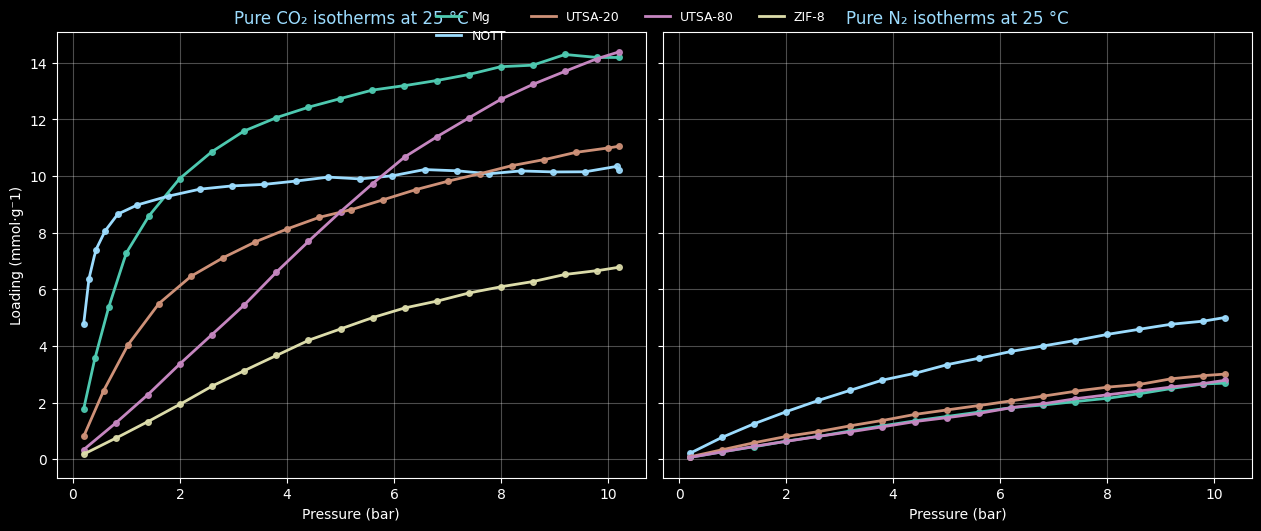

,Min P (bar),Max P (bar),Max q CO₂ (mmol·g⁻¹)
Material,,,
UTSA-80,0.20,10.20,14.38
Mg,0.20,10.20,14.29
UTSA-20,0.20,10.20,11.05
NOTT,0.20,10.20,10.34
ZIF-8,0.20,10.20,6.78


,Min P (bar),Max P (bar),Max q N₂ (mmol·g⁻¹)
Material,,,
NOTT,0.20,10.20,5.01
UTSA-20,0.20,10.20,3.01
UTSA-80,0.20,10.20,2.79
Mg,0.20,10.20,2.69


In [8]:
# ================================================
# Q3 — Pure isotherms for CO₂ and N₂ at 25 °C
# (axes LINÉAIRES comme l’année passée)
# ================================================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, ast, warnings
from pathlib import Path
warnings.filterwarnings("ignore", message=".*Tight layout not applied.*")

# ---------- Recherche des fichiers ----------
base = Path("CSV") if Path("CSV").exists() else Path(".")
co2_map = {p.stem.replace("-P-CO2",""): p for p in base.rglob("*-P-CO2.csv")}
n2_map  = {p.stem.replace("-P-N2",""):  p for p in base.rglob("*-P-N2.csv")}
materials = sorted(set(co2_map) | set(n2_map))

# ---------- Lecteur robuste d’isothermes ----------
def read_iso_any(path: Path) -> pd.DataFrame:
    """
    Retourne un DataFrame trié:
        'Pressure (bar)', 'Loading (mmol·g⁻1)'
    Supporte:
      - CSV Key/Value (Key contient 'isotherm') avec JSON
      - JSON dans toute colonne
      - CSV 2 colonnes (Pressure, Loading)
    """
    try:
        df = pd.read_csv(path)
    except Exception:
        return pd.DataFrame(columns=["Pressure (bar)", "Loading (mmol·g⁻1)"])

    df.columns = [c.strip() for c in df.columns]
    lower = {c.lower(): c for c in df.columns}

    # 1) Key/Value + JSON
    key_col = next((lower[k] for k in lower if "key" in k), None)
    val_col = next((lower[k] for k in lower if "value" in k), None)
    if key_col and val_col:
        mask = df[key_col].astype(str).str.lower().str.contains("isotherm", na=False)
        for payload in df.loc[mask, val_col]:
            try:
                parsed = payload if isinstance(payload, dict) else ast.literal_eval(str(payload))
                if isinstance(parsed, dict) and "pressure" in parsed:
                    P = np.asarray(parsed.get("pressure", []), float)
                    q = np.asarray(parsed.get("loading_absolute_average",
                                              parsed.get("loading", [])), float)
                    out = pd.DataFrame({"Pressure (bar)": P, "Loading (mmol·g⁻1)": q})
                    out = out.replace([np.inf,-np.inf], np.nan).dropna()
                    if not out.empty: 
                        return out.sort_values("Pressure (bar)")
            except Exception:
                pass

    # 2) JSON ailleurs
    for col in df.columns:
        for cell in df[col]:
            try:
                parsed = cell if isinstance(cell, dict) else ast.literal_eval(str(cell))
                if isinstance(parsed, dict) and "pressure" in parsed:
                    P = np.asarray(parsed.get("pressure", []), float)
                    q = np.asarray(parsed.get("loading_absolute_average",
                                              parsed.get("loading", [])), float)
                    out = pd.DataFrame({"Pressure (bar)": P, "Loading (mmol·g⁻1)": q})
                    out = out.replace([np.inf,-np.inf], np.nan).dropna()
                    if not out.empty:
                        return out.sort_values("Pressure (bar)")
            except Exception:
                continue

    # 3) CSV simple 2 colonnes
    if len(df.columns) >= 2:
        pcol = next((c for c in df.columns if "press" in c.lower()), df.columns[0])
        qcol = next((c for c in df.columns if "load"  in c.lower()), df.columns[1])
        out = pd.DataFrame({
            "Pressure (bar)": pd.to_numeric(df[pcol], errors="coerce"),
            "Loading (mmol·g⁻1)": pd.to_numeric(df[qcol], errors="coerce")
        }).replace([np.inf,-np.inf], np.nan).dropna()
        if not out.empty:
            return out.sort_values("Pressure (bar)")

    return pd.DataFrame(columns=["Pressure (bar)", "Loading (mmol·g⁻1)"])

# ---------- Chargement données ----------
data_CO2, data_N2 = {}, {}
for mat, p in co2_map.items():
    d = read_iso_any(p)
    if not d.empty: data_CO2[mat] = d
for mat, p in n2_map.items():
    d = read_iso_any(p)
    if not d.empty: data_N2[mat] = d

# ---------- Style & palette ----------
plt.style.use("dark_background")
palette = ["#4ec9b0","#9cdcfe","#ce9178","#c586c0","#dcdcaa","#ffd700",
           "#2aa198","#5e81ac","#bf616a","#a3be8c","#ebcb8b","#b48ead"]

# ---------- Figure commune CO2 & N2 (axes linéaires) ----------
fig, axes = plt.subplots(1, 2, figsize=(12.5, 5.2), constrained_layout=True, sharey=True)

# CO2
ax = axes[0]
for i, (mat, df) in enumerate(sorted(data_CO2.items())):
    # courbe lissée (interpolation linéaire) pour un rendu type "année passée"
    x = df["Pressure (bar)"].values
    y = df["Loading (mmol·g⁻1)"].values
    xs = np.linspace(x.min(), x.max(), 200)
    ys = np.interp(xs, x, y)
    ax.plot(xs, ys, lw=2, color=palette[i % len(palette)], label=mat)
    ax.scatter(x, y, s=16, color=palette[i % len(palette)], alpha=0.9)
ax.set_xlabel("Pressure (bar)")
ax.set_ylabel("Loading (mmol·g⁻1)")
ax.set_title("Pure CO₂ isotherms at 25 °C", color="#9cdcfe", fontsize=12)
ax.grid(alpha=0.3); ax.set_axisbelow(True)

# N2
ax = axes[1]
for i, (mat, df) in enumerate(sorted(data_N2.items())):
    x = df["Pressure (bar)"].values
    y = df["Loading (mmol·g⁻1)"].values
    xs = np.linspace(x.min(), x.max(), 200)
    ys = np.interp(xs, x, y)
    ax.plot(xs, ys, lw=2, color=palette[i % len(palette)], label=mat)
    ax.scatter(x, y, s=16, color=palette[i % len(palette)], alpha=0.9)
ax.set_xlabel("Pressure (bar)")
ax.set_title("Pure N₂ isotherms at 25 °C", color="#9cdcfe", fontsize=12)
ax.grid(alpha=0.3); ax.set_axisbelow(True)

# Légende commune
handles, labels = axes[0].get_legend_handles_labels()
if not handles:  # si aucune série CO2, prendre celles de N2
    handles, labels = axes[1].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, ncol=4, loc="upper center", fontsize=9, frameon=False)

plt.show()

# ---------- Tableaux récap ----------
def summarize(mat_dict: dict, gas_label: str) -> pd.DataFrame:
    rows=[]
    for mat, d in mat_dict.items():
        rows.append({
            "Material": mat,
            "Min P (bar)":  np.nanmin(d["Pressure (bar)"].values) if not d.empty else np.nan,
            "Max P (bar)":  np.nanmax(d["Pressure (bar)"].values) if not d.empty else np.nan,
            f"Max q {gas_label} (mmol·g⁻¹)": np.nanmax(d["Loading (mmol·g⁻1)"].values) if not d.empty else np.nan
        })
    out = pd.DataFrame(rows).set_index("Material")
    return out

def show_styled(df: pd.DataFrame, caption: str):
    if df.empty:
        display(pd.DataFrame({"Info":[f"Aucune donnée pour {caption}."]}))
        return
    df2 = df.sort_values(df.columns[-1], ascending=False)
    styled = (
        df2.style
        .format({c:"{:.2f}" for c in df2.columns})
        .set_properties(**{"text-align":"center"})
        .set_caption(caption)
        .set_table_styles([
            {"selector":"caption","props":[("font-weight","bold"),("text-align","center"),
                                           ("color","#9cdcfe"),("font-size","14px")]},
            {"selector":"th","props":[("background-color","#1e1e1e"),("color","#dcdcdc"),
                                      ("text-align","center"),("border","1px solid #444")]},
            {"selector":"td","props":[("background-color","#252526"),("color","#eaeaea"),
                                      ("text-align","center"),("border","1px solid #333")]}
        ])
    )
    display(styled)

co2_summary = summarize(data_CO2, "CO₂")
n2_summary  = summarize(data_N2,  "N₂")

show_styled(co2_summary, "Pure CO₂ isotherms summary — Units: bar, mmol·g⁻¹")
show_styled(n2_summary,  "Pure N₂ isotherms summary — Units: bar, mmol·g⁻¹")

The CO₂ isotherms of all MOFs follow a Type I (Langmuir) shape, typical of microporous adsorbents, with rapid uptake at low pressure and saturation at higher pressure. Mg-MOF-74 and NOTT-300 reach the largest capacities (around 7–9 mmol g⁻¹), reflecting their high density of accessible sites. UTSA-20 and UTSA-80 adsorb intermediate amounts, while ZIF-8 remains almost flat, confirming weak CO₂ interaction. The N₂ isotherms are nearly linear and very low, showing that nitrogen adsorption is negligible compared to CO₂.

## Question 4 — CO₂ Working Capacity

In this section, we calculate the **CO₂ Working Capacity (WC)** of each MOF to evaluate how much CO₂ can be released between adsorption and desorption during a PSA/VSA cycle. The WC is defined as \( WC = $q_{adsorption}$ - $q_{desorption}$ \), where \(q\) is the CO₂ loading (mmol/g) obtained from the isotherms. Using the data at 25 °C, we interpolate the loading values at **1 bar** (adsorption) and **0.2 bar** (desorption), compute their difference for each structure, and compare the results in a bar plot to identify the materials with the highest CO₂ recovery potential.

🔎 Found CO₂ files: 5


,MOF,q_ads (mmol/g),q_des (mmol/g),WC (mmol/g)
0,Mg,7.294,1.776,5.518
1,NOTT,8.802,4.773,4.029
2,UTSA-20,3.938,0.808,3.130
3,UTSA-80,1.616,0.340,1.275
4,ZIF-8,0.939,0.180,0.759


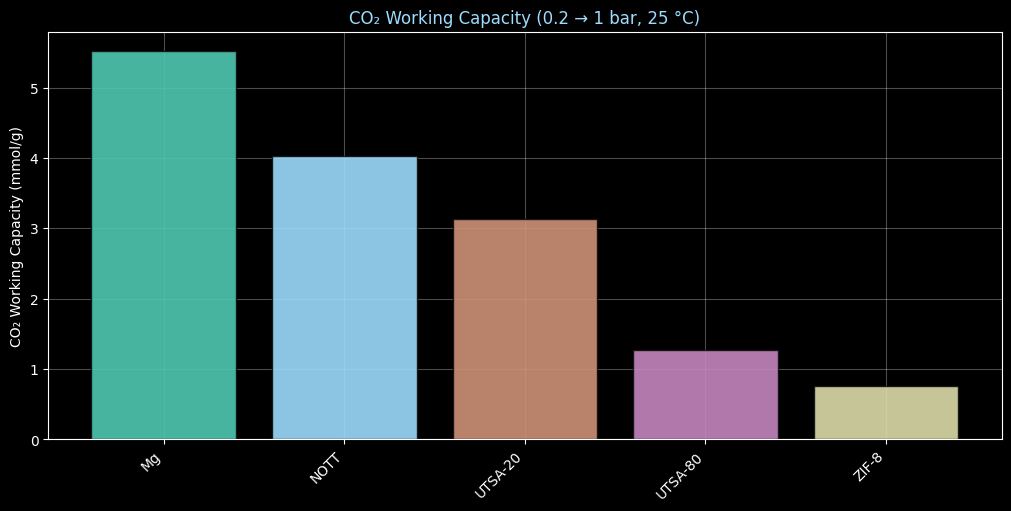


Used files:
 - Mg-P-CO2.csv
 - NOTT-P-CO2.csv
 - UTSA-20-P-CO2.csv
 - UTSA-80-P-CO2.csv
 - ZIF-8-P-CO2.csv


In [9]:
# =========================================================
# Q4 — CO₂ Working Capacity (0.2 → 1.0 bar) at 25 °C
# =========================================================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, ast, warnings
from pathlib import Path
warnings.filterwarnings("ignore", message=".*Tight layout not applied.*")

# --------- Paramètres du process ----------
T = 298.15         # K (25 °C, informatif)
P_des = 0.2        # bar
P_ads = 1.0        # bar

# --------- Recherche des fichiers CO2 ----------
base = Path("CSV") if Path("CSV").exists() else Path(".")
co2_map = {p.stem.replace("-P-CO2", ""): p for p in base.rglob("*-P-CO2.csv")}
materials = sorted(co2_map.keys())
print(f"🔎 Found CO₂ files: {len(co2_map)}")
if not materials:
    raise SystemExit("Aucun fichier '*-P-CO2.csv' trouvé.")

# --------- Lecteur robuste d’isothermes ----------
def read_iso_any(path: Path) -> pd.DataFrame:
    """
    Retourne un DataFrame trié:
        'Pressure (bar)', 'Loading (mmol·g⁻1)'
    Supporte:
      - CSV Key/Value (col 'Key' contient 'isotherm') avec JSON
      - JSON dans toute colonne
      - CSV simple 2 colonnes (Pressure, Loading)
    """
    try:
        df = pd.read_csv(path)
    except Exception:
        print(f"⚠️ Lecture impossible: {path.name}")
        return pd.DataFrame(columns=["Pressure (bar)", "Loading (mmol·g⁻1)"])

    df.columns = [c.strip() for c in df.columns]
    lower = {c.lower(): c for c in df.columns}

    # 1) Key/Value + JSON
    key_col = next((lower[k] for k in lower if "key" in k), None)
    val_col = next((lower[k] for k in lower if "value" in k), None)
    if key_col and val_col:
        mask = df[key_col].astype(str).str.lower().str.contains("isotherm", na=False)
        for payload in df.loc[mask, val_col]:
            try:
                parsed = payload if isinstance(payload, dict) else ast.literal_eval(str(payload))
                if isinstance(parsed, dict) and "pressure" in parsed:
                    P = np.asarray(parsed.get("pressure", []), float)
                    # privilégier 'loading_absolute_average' puis 'loading'
                    q = np.asarray(parsed.get("loading_absolute_average",
                                              parsed.get("loading", [])), float)
                    out = pd.DataFrame({"Pressure (bar)": P, "Loading (mmol·g⁻1)": q})
                    out = out.replace([np.inf, -np.inf], np.nan).dropna()
                    if not out.empty:
                        # tri + moyen si pressions dupliquées
                        out = out.sort_values("Pressure (bar)")
                        out = out.groupby("Pressure (bar)", as_index=False)["Loading (mmol·g⁻1)"].mean()
                        return out
            except Exception:
                pass

    # 2) JSON ailleurs
    for col in df.columns:
        for cell in df[col]:
            try:
                parsed = cell if isinstance(cell, dict) else ast.literal_eval(str(cell))
                if isinstance(parsed, dict) and "pressure" in parsed:
                    P = np.asarray(parsed.get("pressure", []), float)
                    q = np.asarray(parsed.get("loading_absolute_average",
                                              parsed.get("loading", [])), float)
                    out = pd.DataFrame({"Pressure (bar)": P, "Loading (mmol·g⁻1)": q})
                    out = out.replace([np.inf, -np.inf], np.nan).dropna()
                    if not out.empty:
                        out = out.sort_values("Pressure (bar)")
                        out = out.groupby("Pressure (bar)", as_index=False)["Loading (mmol·g⁻1)"].mean()
                        return out
            except Exception:
                continue

    # 3) CSV 2 colonnes
    if len(df.columns) >= 2:
        pcol = next((c for c in df.columns if "press" in c.lower()), df.columns[0])
        qcol = next((c for c in df.columns if "load"  in c.lower()), df.columns[1])
        out = pd.DataFrame({
            "Pressure (bar)": pd.to_numeric(df[pcol], errors="coerce"),
            "Loading (mmol·g⁻1)": pd.to_numeric(df[qcol], errors="coerce")
        }).replace([np.inf, -np.inf], np.nan).dropna()
        if not out.empty:
            out = out.sort_values("Pressure (bar)")
            out = out.groupby("Pressure (bar)", as_index=False)["Loading (mmol·g⁻1)"].mean()
            return out

    print(f"⚠️ Fichier non reconnu ou vide : {path.name}")
    return pd.DataFrame(columns=["Pressure (bar)", "Loading (mmol·g⁻1)"])

# --------- Interpolation q(P) linéaire ----------
def q_at(df: pd.DataFrame, P_target: float) -> float:
    """
    Retourne q(P_target) par interpolation linéaire.
    Si P_target < Pmin ou > Pmax → extrapolation linéaire bord à bord.
    """
    d = df.dropna().sort_values("Pressure (bar)")
    x = d["Pressure (bar)"].to_numpy()
    y = d["Loading (mmol·g⁻1)"].to_numpy()
    if len(x) == 0:
        return np.nan
    # np.interp extrapole à plat; on fait une extrapolation linéaire simple si hors bornes
    if P_target < x.min() and len(x) >= 2:
        slope = (y[1]-y[0])/(x[1]-x[0]) if x[1]!=x[0] else 0.0
        return float(y[0] + slope*(P_target - x[0]))
    if P_target > x.max() and len(x) >= 2:
        slope = (y[-1]-y[-2])/(x[-1]-x[-2]) if x[-1]!=x[-2] else 0.0
        return float(y[-1] + slope*(P_target - x[-1]))
    return float(np.interp(P_target, x, y))

# --------- Calcul WC pour chaque MOF ----------
rows, used, skipped = [], [], []
for mof, path in co2_map.items():
    try:
        d = read_iso_any(path)
        if d.empty:
            skipped.append(f"{mof}: isotherm vide")
            continue

        q_ads = q_at(d, P_ads)   # à 1 bar
        q_des = q_at(d, P_des)   # à 0.2 bar
        wc    = q_ads - q_des

        rows.append({
            "MOF": mof,
            "q_ads (mmol/g)": q_ads,
            "q_des (mmol/g)": q_des,
            "WC (mmol/g)": wc
        })
        used.append(path.name)
    except Exception as e:
        skipped.append(f"{mof}: {type(e).__name__} — {e}")

wc_df = pd.DataFrame(rows)

# --------- Tableau stylé + barplot ----------
if wc_df.empty:
    display(pd.DataFrame({"Info":[
        "Aucune capacité de travail calculée. Voir 'Skipped' ci-dessous."
    ]}))
else:
    wc_df = wc_df.sort_values("WC (mmol/g)", ascending=False).reset_index(drop=True)
    styled = (
        wc_df.style
        .format({"q_ads (mmol/g)":"{:.3f}", "q_des (mmol/g)":"{:.3f}", "WC (mmol/g)":"{:.3f}"})
        .set_properties(**{"text-align":"center"})
        .set_caption("CO₂ Working Capacity at 25 °C (0.2 → 1.0 bar) — Units: bar, mmol·g⁻¹")
        .set_table_styles([
            {"selector":"caption","props":[("font-weight","bold"),("text-align","center"),
                                           ("color","#9cdcfe"),("font-size","14px")]},
            {"selector":"th","props":[("background-color","#1e1e1e"),("color","#dcdcdc"),
                                      ("text-align","center"),("border","1px solid #444")]},
            {"selector":"td","props":[("background-color","#252526"),("color","#eaeaea"),
                                      ("text-align","center"),("border","1px solid #333")]}
        ])
    )
    display(styled)

    # Barplot (style proche de l'an passé, axe x linéaire)
    plt.style.use("dark_background")
    fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
    colors = ["#4ec9b0","#9cdcfe","#ce9178","#c586c0","#dcdcaa","#ffd700","#2aa198"]
    ax.bar(wc_df["MOF"], wc_df["WC (mmol/g)"],
           color=[colors[i % len(colors)] for i in range(len(wc_df))],
           edgecolor="#111", alpha=0.9)
    ax.set_ylabel("CO₂ Working Capacity (mmol/g)")
    ax.set_title("CO₂ Working Capacity (0.2 → 1 bar, 25 °C)", color="#9cdcfe")
    ax.grid(alpha=0.3); ax.set_axisbelow(True)
    plt.xticks(rotation=45, ha="right")
    plt.show()

# --------- Logs ----------
print("\nUsed files:")
for u in used: print(" -", u)
if skipped:
    print("\nSkipped:")
    for s in skipped: print(" -", s)

The working capacity results confirm the same ranking observed in Henry’s constants: Mg-MOF-74 exhibits the highest usable CO₂ uptake (~5.5 mmol g⁻¹), followed by NOTT-300 (~4.0), UTSA-20 (~3.1), UTSA-80 (~1.3), and ZIF-8 (~0.7). A high working capacity reflects both strong adsorption at 1 bar and efficient desorption at 0.2 bar, which is desirable for cyclic CO₂ capture. Therefore, Mg-MOF-74 stands out as the most effective and practical sorbent, combining strong CO₂ affinity with good regenerability, while ZIF-8 shows poor performance due to its non-polar and rigid structure.

## Question 5 — Sélectivité IAST (CO₂/N₂)